In [1]:
!pip install numpy
!pip install matplotlib
!pip install tqdm

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim



In [42]:
t=np.arange(0,30.01,0.01)
Limits = np.array([20.,20.])
ro=np.array([-15.,-5.])
vo=np.array([1.,0])
ao=np.array([0,-9.8])

[[-15.          -5.        ]
 [-14.99        -5.        ]
 [-14.98        -5.00098   ]
 ...
 [ 14.98       -18.98482566]
 [ 14.99       -18.9825948 ]
 [ 15.         -18.98134395]]


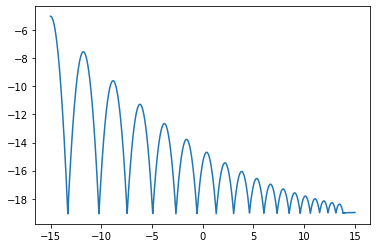

In [43]:
class particle():
    
    def __init__(self,r0,v0,a0,t,R):
        
        self.dt=0.01
        self.r=r0
        self.v=v0
        self.a=a0
        self.R=R
        self.rV= np.zeros( (len(t),len(r0)) )
        self.vV= np.zeros( (len(t),len(v0)) )
        self.aV= np.zeros( (len(t),len(a0)) )   
    
    def SetPosition(self,i,r):
        self.rV[i] = r
        
    def SetVelocity(self,i,v):
        self.vV[i] = v
        
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.R > limits[i]:
                self.v[i] = - self.v[i]*0.9
            if self.r[i] - self.R < - limits[i]:
                self.v[i] = - self.v[i]*0.9
    
p=particle(ro,vo,ao,t,1.)
                
for i in range(len(t)):
    p.CheckWallLimits(Limits)
    p.Evolution(i)
print(p.rV)

x=p.rV[:,0]
y=p.rV[:,1]
plt.figure
plt.plot(x,y)
        